# Let's Now go the the next assignment of this course which is on building an intelligent gridworld agent 

# This is going to be a complex one and involves multiple methods for implementation 


# first of this series would be implementation of policy evaluation i.e. given a policy what is the state value function. 
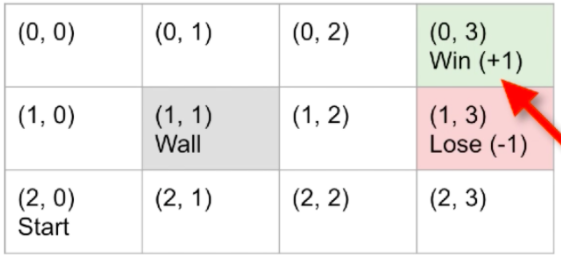

In [110]:
import numpy as np

In [137]:
class grid_world:
    
    def __init__(self,rows,cols,start_point):   # initialise by defining the grid and the initial state in the grid being considered for the game
        
        self.rows = rows                        # assigning number of rows and cols for the grid
        self.cols = cols
        self.i=start_point[0]                   # initial grid ID
        self.j=start_point[1]                   
    
    def set1(self,rewards,actions):             # setting up rewards and possible actions for the games 
        
        self.rewards = rewards
        self.actions = actions
        
    def set_state(self,s):                      # setting state 
        
        self.i = s[0]
        self.j = s[1]
        
    def current_state(self):                    # checking state of the game at any instance
        
        return(self.i,self.j)
    
    def is_terminal(self,s):                    # checking if any state is terminal or not
        
        return s not in self.actions
    
    def get_next_state(self,s,a):               # getting next action based on the given state and action pair
        
        i,j = s[0],s[1]
        
        if a in self.actions[(i,j)]:
            
            if a == 'U':
                
                i-=1
                
            elif a =='D':
                
                i+=1
                
            elif a =='R':
                
                j+=1
            
            elif a == 'L' :
                
                j-=1
                
        return (i,j)
    
    def move(self,a):                        # taking action based on current state (notice the difference current and given) and action and returning the reward received.
        
        if a in self.actions[(self.i,self.j)]:
            
            if a == 'U':
                
                self.i-=1
                
            elif a =='D':
                
                self.i+=1
                
            elif a =='R':
                
                self.j+=1
            
            elif a == 'L' :
                
                self.j-=1
                
        return self.rewards.get((self.i,self.j),0)
    
    def undo_move(self,a):                  # undoing any prior action
            
        if a == 'U':
                
            self.i+=1
                
        elif a =='D':
                
            self.i-=1
                
        elif a =='R':
                
            self.j-=1
            
        elif a == 'L' :
                
            self.j+=1
                
        assert(self.current_state() in self.all_states())
        
    def game_over(self,s):                  # checking if we have reached terminal state 
        
        return s not in self.actions  
    
    def all_states(self):                   # listing down all possible states 
    
        return(self.actions.keys()|self.rewards.keys())
    
    def standard_grid():                    # defining a standard grid for illustration used in the course 
        
        grid = grid_world(3,4,(2,0))
        
        rewards = {(0,3):1,(1,3):-1}
        actions = {(0,0):['R','D'],
              (0,1):['R','L'],
              (0,2):['R','L','D'],
              #(0,3):['L','D'],   terminal state
              (1,0):['U','D'],
              #(1,1):['R','L'] wall
              (1,2):['R','U','D'],
              #(1,3):['L','D'],     terminal state
              (2,0):['U','R'],
              (2,1):['R','L'],
              (2,2):['R','L','U'],
              (2,3):['L','U'],}
        
        grid.set1(rewards,actions)
        
        return grid
        

# Next two cells are dedicated towards testing of the above class and methods in it

In [138]:

grid1=grid_world(3,4,(2,0))

rewards = {(0,3):1,(1,3):-1}
actions = {(0,0):['R','D'],
          (0,1):['R','L'],
          (0,2):['R','L','D'],
          #(0,3):['L','D'],   terminal state
          (1,0):['U','D'],
          #(1,1):['R','L'] wall
          (1,2):['R','U','D'],
          #(1,3):['L','D'],     terminal state
          (2,0):['u','R'],
          (2,1):['R','L'],
          (2,2):['R','L','U'],
          (2,3):['L','U'],}

grid1.set1(rewards,actions)

grid1.set_state((2,3))

print(grid1.current_state())

#print(grid1.get_next_state((0,0),'R'))

print(grid1.move('U'))

grid1.undo_move('U')

print(grid1.game_over((0,2)))

print(grid1.current_state())

(2, 3)
-1
False
(2, 3)


In [139]:
trial_grid = grid_world.standard_grid()

trial_grid.set_state((2,3))

trial_grid.current_state()

(2, 3)

# Lets define functions for deterministic policy evaluation for the grid world problem 

### deterministic here, means that at any stage we know where to go next with probability 1. hence at any stage as per our policy we will have only one action and hence only one next state

In [140]:
game = grid_world.standard_grid()      # defining a standard grid

threshold_value = 1e-4

gamma = .9

def print_function(V):

    print('{}:{:.3f}'.format((0,0),V[(0,0)]),'|',
          '{}:{:.3f}'.format((0,1),V[(0,1)]),'|',
          '{}:{:.3f}'.format((0,2),V[(0,2)]),'|',
          '{}:{:.3f}'.format((0,3),V[(0,3)]),'|','\n'
          ,'---------------------------------------------------------','\n'
          '{}:{:.3f}'.format((1,0),V[(1,0)]),'|',
          '{}:{}'.format((1,1),'wall'),'|',
          '{}:{:.3f}'.format((1,2),V[(1,2)]),'|',
          '{}:{:.3f}'.format((1,3),V[(1,3)]),'|','\n'
          ,'---------------------------------------------------------','\n'
          '{}:{:.3f}'.format((2,0),V[(2,0)]),'|',
          '{}:{:.3f}'.format((2,1),V[(2,1)]),'|',
          '{}:{:.3f}'.format((2,2),V[(2,2)]),'|',
          '{}:{:.3f}'.format((2,3),V[(2,3)]),'|',
            )
            
            
transition_prob = {}                   # defining empty dictionary to store transition probablities 

rewards = {}                           # defining a dictionary to store rewards


for s in game.all_states():            # assigning transition probabilities and rewards
    if game.is_terminal(s) == False:
         for a in game.actions[s]:
            s2=game.get_next_state(s,a)
            transition_prob[s,a,s2] = 1
            if s2 in game.rewards:
                rewards[s,a,s2] = game.rewards[s2]
        
print('transition_probs','\n\n',transition_prob,'\n')
print('rewards','\n\n',rewards,'\n')

policy = policy= {(0,0):'R',          # defining policy to be evaluated 
          (0,1):'R',
          (0,2):'R',
          (1,0):'U',
          (1,2):'U',
          (2,0):'U',
          (2,1):'R',
          (2,2):'U',
          (2,3):'L'}

V = {}

for s in game.all_states():
    V[s] = 0 
    

def policy_evaluation():
    
    it=0
    
    while True:
        
        max_error = 0
        
        for s in game.all_states():
            
            if game.is_terminal(s) == False:
                
                old_V = V[s]
                new_V = 0
                
                #print(s,old_V,new_V)
                
                for a in game.actions[s]:
                    
                    for s2 in game.all_states():
                        
                        action_prob = 1  if policy.get(s) == a else 0
                        
                        #print(action_prob)
                        
                        r = rewards.get((s,a,s2),0)
                        
                        new_V += action_prob*transition_prob.get((s,a,s2),0)*(r+gamma*V[s2])
                        
                V[s] = new_V
                
                max_error = max(max_error,np.abs(old_V-V[s]))
                
        
        it+=1
        
        if max_error < threshold_value:
            
            break
            
        print(it)
        
        print_function(V)

transition_probs 

 {((0, 1), 'R', (0, 2)): 1, ((0, 1), 'L', (0, 0)): 1, ((1, 2), 'R', (1, 3)): 1, ((1, 2), 'U', (0, 2)): 1, ((1, 2), 'D', (2, 2)): 1, ((0, 0), 'R', (0, 1)): 1, ((0, 0), 'D', (1, 0)): 1, ((2, 1), 'R', (2, 2)): 1, ((2, 1), 'L', (2, 0)): 1, ((2, 0), 'U', (1, 0)): 1, ((2, 0), 'R', (2, 1)): 1, ((2, 3), 'L', (2, 2)): 1, ((2, 3), 'U', (1, 3)): 1, ((2, 2), 'R', (2, 3)): 1, ((2, 2), 'L', (2, 1)): 1, ((2, 2), 'U', (1, 2)): 1, ((1, 0), 'U', (0, 0)): 1, ((1, 0), 'D', (2, 0)): 1, ((0, 2), 'R', (0, 3)): 1, ((0, 2), 'L', (0, 1)): 1, ((0, 2), 'D', (1, 2)): 1} 

rewards 

 {((1, 2), 'R', (1, 3)): -1, ((2, 3), 'U', (1, 3)): -1, ((0, 2), 'R', (0, 3)): 1} 



In [141]:
policy_evaluation()

1
(0, 0):0.000 | (0, 1):0.000 | (0, 2):1.000 | (0, 3):0.000 | 
 --------------------------------------------------------- 
(1, 0):0.000 | (1, 1):wall | (1, 2):0.000 | (1, 3):0.000 | 
 --------------------------------------------------------- 
(2, 0):0.000 | (2, 1):0.000 | (2, 2):0.000 | (2, 3):0.000 |
2
(0, 0):0.810 | (0, 1):0.900 | (0, 2):1.000 | (0, 3):0.000 | 
 --------------------------------------------------------- 
(1, 0):0.729 | (1, 1):wall | (1, 2):0.900 | (1, 3):0.000 | 
 --------------------------------------------------------- 
(2, 0):0.000 | (2, 1):0.000 | (2, 2):0.810 | (2, 3):0.000 |
3
(0, 0):0.810 | (0, 1):0.900 | (0, 2):1.000 | (0, 3):0.000 | 
 --------------------------------------------------------- 
(1, 0):0.729 | (1, 1):wall | (1, 2):0.900 | (1, 3):0.000 | 
 --------------------------------------------------------- 
(2, 0):0.656 | (2, 1):0.729 | (2, 2):0.810 | (2, 3):0.729 |
